In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from keras import Sequential
from keras.layers import Dense, Dropout

In [2]:
df = pd.read_csv("./Data/GOOG.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


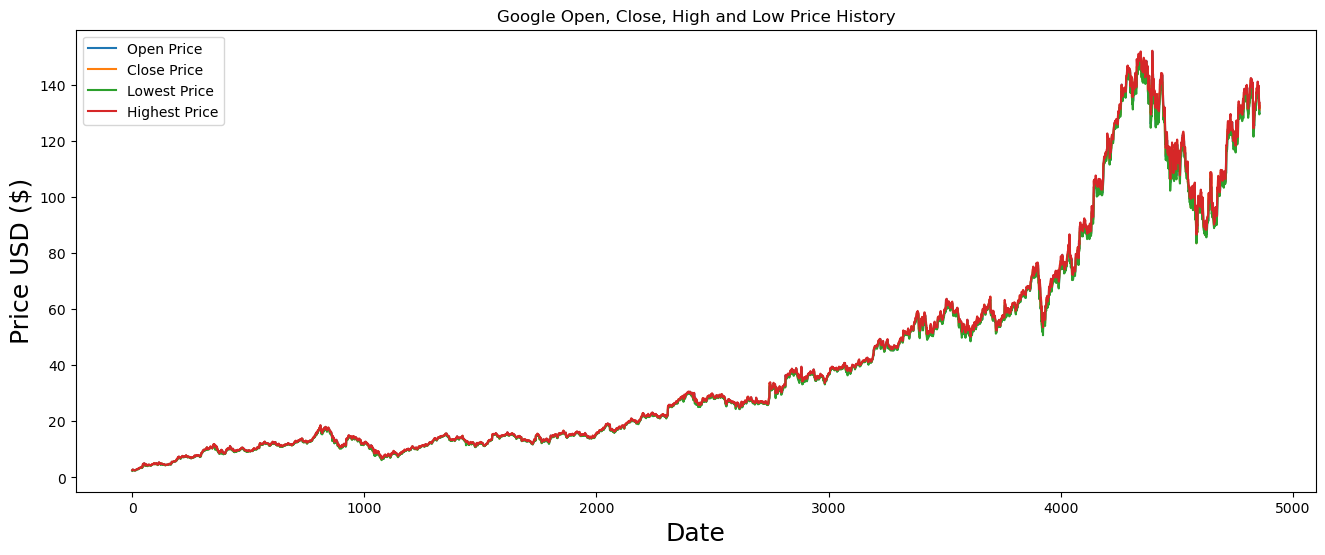

In [6]:
plt.figure(figsize=(16,6))
plt.title("Google Open, Close, High and Low Price History")
plt.plot(df["Open"], label="Open Price")
plt.plot(df["Close"], label="Close Price")
plt.plot(df["Low"], label="Lowest Price")
plt.plot(df["High"], label="Highest Price")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.legend()
plt.show()

In [8]:
df["Date"] = pd.to_datetime(df["Date"]).astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4858 non-null   int64  
 1   Open       4858 non-null   float64
 2   High       4858 non-null   float64
 3   Low        4858 non-null   float64
 4   Close      4858 non-null   float64
 5   Adj Close  4858 non-null   float64
 6   Volume     4858 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 265.8 KB


In [12]:
X = df[['Date','Open','High','Low','Volume']]
y = df[['Close','Adj Close']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = Sequential()
model.add(Dense(28, activation="relu", input_shape=(X_train.shape[1], )))
model.add(Dense(14, activation="relu"))
model.add(Dense(1, activation="linear"))

In [20]:
model.compile(loss="mean_squared_error", optimizer="Adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
98/98 [==============================] - 1s 5ms/step - loss: 3081.4839 - accuracy: 0.0000e+00 - val_loss: 3066.2014 - val_accuracy: 0.0000e+00
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 2710.0732 - accuracy: 0.0000e+00 - val_loss: 2394.5156 - val_accuracy: 0.0000e+00
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 1770.9447 - accuracy: 0.0000e+00 - val_loss: 1210.9860 - val_accuracy: 0.0000e+00
Epoch 4/100
98/98 [==============================] - 0s 3ms/step - loss: 734.6833 - accuracy: 0.0000e+00 - val_loss: 433.6020 - val_accuracy: 0.0000e+00
Epoch 5/100
98/98 [==============================] - 0s 3ms/step - loss: 298.6514 - accuracy: 0.0000e+00 - val_loss: 216.6384 - val_accuracy: 0.0000e+00
Epoch 6/100
98/98 [==============================] - 0s 3ms/step - loss: 155.4772 - accuracy: 0.0000e+00 - val_loss: 107.9197 - val_accuracy: 0.0000e+00
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 72.

In [21]:
model.evaluate(X_test, y_test)

31/31 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.0000e+00


[0.3680621385574341, 0.0]

In [23]:
y_pred = model.predict(X_test)
y_test_series = y_test.iloc[:, 0]

r2 = r2_score(y_test_series, y_pred) * 100
print(f'R² score: {r2}')

31/31 [==============================] - 0s 2ms/step
R² score: 99.97650564126835
